# Clustering Based on Neural Networks in Wireless Sensor Networks

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

---
## Using Cluster Blobs and Clustering with KMeans


In [3]:
df = pd.read_csv("../Dataset/blobs_dataset.csv")
df.head()

,x,y
0,2.934995,1.421875
1,0.266041,2.719150
2,0.697940,4.428867
3,0.259897,4.613309
4,2.956576,0.033718


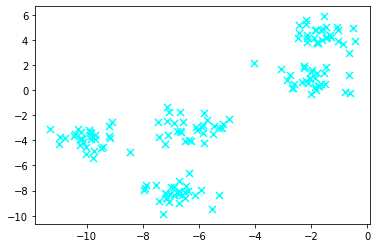

[0 0 2 1 3 2 0 0 4 3 4 3 4 1 4 3 4 3 4 2 1 3 1 3 2 3 1 1 2 1 0 0 2 1 4 1 2
 2 4 4 2 3 0 4 0 1 3 2 2 1 0 4 0 0 1 2 1 2 3 0 3 3 4 1 4 2 2 2 4 1 0 3 0 4
 3 3 1 2 0 0 3 2 1 1 2 0 3 2 4 3 2 4 4 4 4 4 2 2 0 3 1 4 3 1 0 1 0 1 0 2 4
 3 0 3 4 3 0 0 1 1 2 3 4 4 1 2 3 1 4 4 3 0 2 2 2 1 0 0 2 4 1 1 4 1 0 0 0 3
 3 3]


In [33]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=5,cluster_std=0.7,
    shuffle=True, random_state=1
)
# np.savetxt("../Dataset/blobs_dataset.csv",X,delimiter=",")
#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [34]:
#Applying clustering assuming 3 nodes

km = KMeans(
    n_clusters=5
    ,init='random',
    n_init=10,max_iter=300,
    tol=1e-04,random_state=0
)

y_km = km.fit_predict(X)

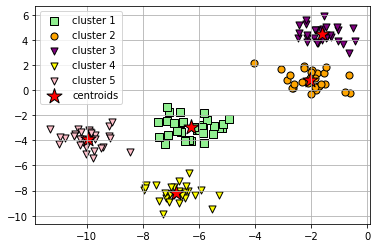

In [35]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='purple',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)
plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='pink',
    marker='v', edgecolor='black',
    label='cluster 5'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

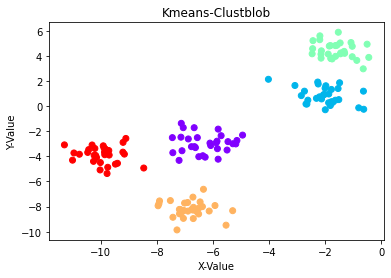

In [36]:
plt.scatter(X[:,0],X[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Clustblob")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
# plt.savefig("kmeans_blob.jpg")
# plt.legend()  

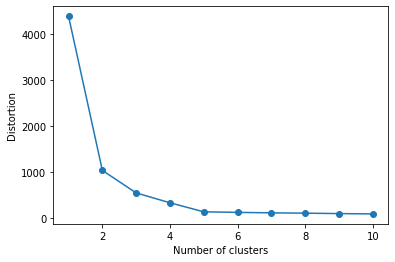

In [37]:
# Using Elbow method to determine appropriate number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- The above plot tells us that 5 clusters are appropriate enough due to the elbow forming at 5 and the improvement becomes very less there after